In [1]:
import numpy as np
import tol_colors as tc

import bpmModel

# Load colorblind friendly color map
cmap = tc.tol_cmap('sunset')

# Get pint registry from the bpmModel since mixed registries are not allowed
u = bpmModel.u

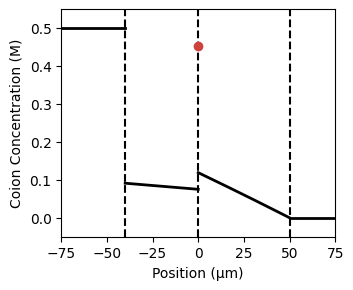

In [2]:
N212 = bpmModel.IonExchangeMembrane(
    name="Nafion 212",
    membrane_type="CEM",
    thickness=50 * u["µm"],
    fixed_charge_concentration=1.6 * u["M"],
    cation_diffusion_coefficient=1.0e-6 * u["cm²/s"],
    anion_diffusion_coefficient=5.0e-8 * u["cm²/s"],
)
A40 = bpmModel.IonExchangeMembrane(
    name="A40",
    membrane_type="AEM",
    thickness=40 * u["µm"],
    fixed_charge_concentration=2.65 * u["M"],
    cation_diffusion_coefficient=3.0e-7 * u["cm²/s"],
    anion_diffusion_coefficient=1.0e-6 * u["cm²/s"],
)
model = bpmModel.BPMSystem(
    CEM=N212, AEM=A40, left_solution_concentration=0.5, right_solution_concentration=0.0
)

AEM_high = model.AEM_high.generate_concentration_profiles(show_Cs=True)
fig1 = AEM_high["fig"]

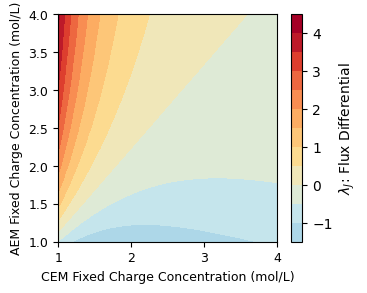

In [3]:
model.update_AEM_parameters(thickness=50 * u["µm"])
fig, ax, data = model.generate_differential_plot(
    "fixed_charge_concentration",
    x_range=[1, 4],
    y_range=[1, 4],
    mesh_type="linear",
    n_points=30,
    text_location="off",
    contourf_args={"cmap": cmap},
    colorbar_args={
        "label": r"$\lambda_J$: Flux Differential",
    },
    auto_vminmax=True,
)
ax.set_xlabel(f"CEM Fixed Charge Concentration (mol/L)", fontsize=9)
ax.set_ylabel(f"AEM Fixed Charge Concentration (mol/L)", fontsize=9)
ax.tick_params(axis="both", labelsize=9)


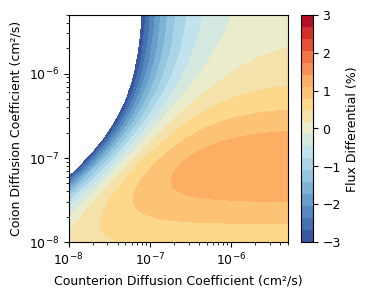

In [4]:
fig, ax, data = model.generate_differential_plot(
    "ion_diffusion_coefficients_counter_co",
    x_range=[1e-8, 5e-6],
    y_range=[1e-8, 5e-6],
    membrane="AEM",
    mesh_type="log",
    n_points=30,
    text_location="off",
    contourf_args={"levels": np.linspace(-3, 3, 20), "cmap": cmap},
    colorbar_args={
        "ticks": np.arange(-3, 3.1, 1),
    },
    auto_vminmax=False,
)
ax.set_xlabel(f"Counterion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.set_ylabel(f"Coion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.tick_params(axis="both", labelsize=9)
cb = data[3]
cb.ax.tick_params(axis="both", labelsize=9)
data[3].set_label(
    label="Flux Differential (%)", size=9
)

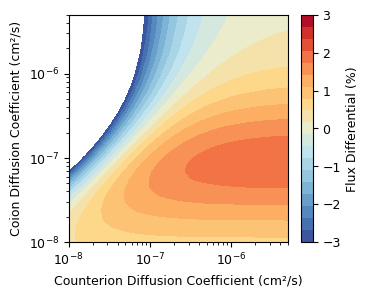

In [5]:
model.update_CEM_parameters(
    fixed_charge_concentration=1.4 * u["M"],
)

fig, ax, data = model.generate_differential_plot(
    "ion_diffusion_coefficients_counter_co",
    x_range=[1e-8, 5e-6],
    y_range=[1e-8, 5e-6],
    membrane="AEM",
    mesh_type="log",
    n_points=30,
    text_location="off",
    contourf_args={"levels": np.linspace(-3, 3, 20), "cmap": cmap},
    colorbar_args={
        "ticks": np.arange(-3, 3.1, 1),
        # "label": "Flux Differential",
    },
    auto_vminmax=False,
)
ax.set_xlabel(f"Counterion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.set_ylabel(f"Coion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.tick_params(axis="both", labelsize=9)
cb = data[3]
cb.ax.tick_params(axis="both", labelsize=9)
data[3].set_label(
    label="Flux Differential (%)", size=9
)
fig.savefig("figs/CEM_1.4.pdf", bbox_inches="tight")

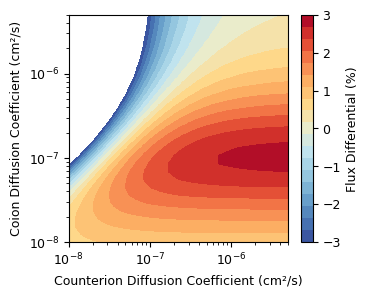

In [6]:
model.update_CEM_parameters(
    fixed_charge_concentration=1.2 * u["M"],
)

fig, ax, data = model.generate_differential_plot(
    "ion_diffusion_coefficients_counter_co",
    x_range=[1e-8, 5e-6],
    y_range=[1e-8, 5e-6],
    membrane="AEM",
    mesh_type="log",
    n_points=30,
    text_location="off",
    contourf_args={"levels": np.linspace(-3, 3, 20), "cmap": cmap},
    colorbar_args={
        "ticks": np.arange(-3, 3.1, 1),
        # "label": "Flux Differential",
    },
    auto_vminmax=False,
)
ax.set_xlabel(f"Counterion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.set_ylabel(f"Coion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.tick_params(axis="both", labelsize=9)
cb = data[3]
cb.ax.tick_params(axis="both", labelsize=9)
data[3].set_label(
    label="Flux Differential (%)", size=9
)
fig.savefig("figs/CEM_1.2.pdf", bbox_inches="tight")

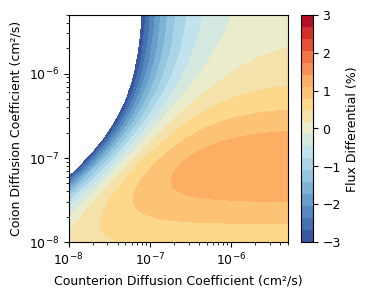

In [7]:
model.update_CEM_parameters(
    fixed_charge_concentration=1.6 * u["M"],
)

fig, ax, data = model.generate_differential_plot(
    "ion_diffusion_coefficients_counter_co",
    x_range=[1e-8, 5e-6],
    y_range=[1e-8, 5e-6],
    membrane="AEM",
    mesh_type="log",
    n_points=30,
    text_location="off",
    contourf_args={
        "levels": np.linspace(-3, 3, 20),
        "cmap": cmap,
    },
    colorbar_args={
        "ticks": np.arange(-3, 3.1, 1),
    },
    auto_vminmax=False,
)
ax.set_xlabel(f"Counterion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.set_ylabel(f"Coion Diffusion Coefficient (cm²/s)", fontsize=9)
ax.tick_params(axis="both", labelsize=9)
cb = data[3]
cb.ax.tick_params(axis="both", labelsize=9)
data[3].set_label(label="Flux Differential (%)", size=9)
fig.savefig("figs/CEM_1.6.pdf", bbox_inches="tight")